In [56]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium # plotting library
import seaborn as sns

## FourSquare API Credentials

In [160]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


## Get, clean and consolidate the Chinese Restaurant locations in the 4 analysis areas

In [6]:
dupont = 'Dupont Circle, Washington DC, 20009'
bethesda = 'Bethesda, MD, 20810'
arlington = 'Arlington, VA, 20330'
silver_spring = 'Silver Spring, MD, 20917'

geolocator = Nominatim(user_agent="foursquare_agent")
dupont_location = geolocator.geocode(dupont)
bethesda_location = geolocator.geocode(bethesda)
arlington_location = geolocator.geocode(arlington)
silver_spring_location = geolocator.geocode(silver_spring)

dupont_latitude = dupont_location.latitude
dupont_longitude = dupont_location.longitude

bethesda_latitude = bethesda_location.latitude
bethesda_longitude = bethesda_location.longitude

arlington_latitude = arlington_location.latitude
arlington_longitude = arlington_location.longitude

silver_spring_latitude = silver_spring_location.latitude
silver_spring_longitude = silver_spring_location.longitude

In [8]:
search_query = 'Chinese Restaurants'
radius = 3000
LIMIT = 30
print(search_query + ' .... OK!')

Chinese Restaurants .... OK!


In [9]:
dupont_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dupont_latitude, dupont_longitude, VERSION, search_query, radius, LIMIT)
bethesda_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, bethesda_latitude, bethesda_longitude, VERSION, search_query, radius, LIMIT)
arlington_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, arlington_latitude, arlington_longitude, VERSION, search_query, radius, LIMIT)
silver_spring_url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, silver_spring_latitude, silver_spring_longitude, VERSION, search_query, radius, LIMIT)

In [11]:
results_dupont = requests.get(dupont_url).json()
results_bethesda = requests.get(bethesda_url).json()
results_arlington = requests.get(arlington_url).json()
results_silver_spring = requests.get(silver_spring_url).json()


In [13]:
# assign relevant part of JSON to venues
venues_dupont = results_dupont['response']['venues']
venues_bethesda = results_bethesda['response']['venues']
venues_arlington = results_arlington['response']['venues']
venues_silver_spring = results_silver_spring['response']['venues']


# tranform venues into a dataframe
dataframe_dupont = json_normalize(venues_dupont)
dataframe_bethesda = json_normalize(venues_bethesda)
dataframe_arlington = json_normalize(venues_arlington)
dataframe_silver_spring = json_normalize(venues_silver_spring)


In [25]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_silver_spring.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe_silver_spring.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

silver_spring_chinese_restaurants = dataframe_filtered[dataframe_filtered.categories == "Chinese Restaurant"]

In [26]:
dupont_chinese_restaurants
bethesda_chinese_restaurants
arlington_chinese_restaurants
silver_spring_chinese_restaurants

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
1,Chinese Express,Chinese Restaurant,7613 Wisconsin Ave,US,Bethesda,United States,3066,"[7613 Wisconsin Ave, Bethesda, MD 20814, Unite...","[{'label': 'display', 'lat': 39.01893767964689...",39.018938,-77.045346,20814,MD,4e4c97ebbd413c4cc66a92be
2,Palais De Lune,Chinese Restaurant,8315 Grubb Rd,US,Silver Spring,United States,1557,"[8315 Grubb Rd, Silver Spring, MD 20910, Unite...","[{'label': 'display', 'lat': 38.99249082132132...",38.992491,-77.049166,20910,MD,4c3b92734565e21e6af3566a
3,Mayflower,Chinese Restaurant,1905 Seminary Rd,US,Silver Spring,United States,1864,"[1905 Seminary Rd, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 39.00883358135738...",39.008834,-77.040359,20910,MD,4e4e6380bd4101d0d7a90cb2
4,Mayflower Chinese Restaurant & Carryout,Chinese Restaurant,1905 Seminary Rd,US,Silver Spring,United States,1877,"[1905 Seminary Rd, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 39.00889031769331...",39.008890,-77.040556,20910,MD,4c62af65eb82d13a22e705d6
5,Hunan City Chinese Restaurant,Chinese Restaurant,9429 Georgia Ave,US,Silver Spring,United States,1983,"[9429 Georgia Ave, Silver Spring, MD 20910, Un...","[{'label': 'display', 'lat': 39.0100143089668,...",39.010014,-77.040353,20910,MD,4cddcf59c4f6a35de7c4c56c


In [36]:
dupont_chinese_restaurants['DC_Area'] = "Dupont Circle"
bethesda_chinese_restaurants['DC_Area'] = "Bethesda"
arlington_chinese_restaurants['DC_Area'] = "Arlington"
silver_spring_chinese_restaurants['DC_Area'] = "Silver Spring"

C:\Users\bgee\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [43]:
total

,DC_Area,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,state
1,Dupont Circle,3532 Georgia Ave NW,Chinese Restaurant,US,Washington,United States,NaN,3041,"[3532 Georgia Ave NW, Washington, D.C. 20010, ...",4c8a5d6e1dcd199c32b1531b,"[{'label': 'display', 'lat': 38.93394097662317...",38.933941,-77.023760,Chinese Hunan American Carry-Out,20010,D.C.
3,Dupont Circle,103 Rhode Island Ave NW,Chinese Restaurant,US,Washington,United States,Rhode Island Ave and 1st St NW,2639,[103 Rhode Island Ave NW (Rhode Island Ave and...,4be38508d27a20a1d492925b,"[{'label': 'display', 'lat': 38.91565767986081...",38.915658,-77.012859,Chinese Dragon Carry-Out,20001,D.C.
6,Dupont Circle,103 Rhode Island Ave NW,Chinese Restaurant,US,Washington,United States,NaN,2694,"[103 Rhode Island Ave NW, Washington, D.C., Un...",4f32aebf19836c91c7ef7c95,"[{'label': 'display', 'lat': 38.91565874386569...",38.915659,-77.012215,Chinese Dragon,NaN,D.C.
7,Dupont Circle,NaN,Chinese Restaurant,US,Milford,United States,NaN,1795,"[Milford, CT, United States]",5987e7d6b9a5a866d5b6c0d4,"[{'label': 'display', 'lat': 38.911498, 'lng':...",38.911498,-77.022013,Chinese Zodiac,NaN,CT
12,Dupont Circle,510 I St NW,Chinese Restaurant,US,Washington,United States,NaN,2282,"[510 I St NW, Washington, D.C., United States]",4f3210c319833175d60d1361,"[{'label': 'display', 'lat': 38.900792, 'lng':...",38.900792,-77.019831,Chinese Consolidated Bnvlnt,NaN,D.C.
14,Dupont Circle,2020 P St NW,Chinese Restaurant,US,Washington,United States,21st,307,"[2020 P St NW (21st), Washington, D.C. 20036, ...",49e6603af964a52040641fe3,"[{'label': 'display', 'lat': 38.90957833159901...",38.909578,-77.045815,New Dynasty,20036,D.C.
16,Dupont Circle,610 H St NW,Chinese Restaurant,US,Washington,United States,NaN,2297,"[610 H St NW, Washington, D.C. 20001, United S...",4ac7d33df964a520f6b920e3,"[{'label': 'display', 'lat': 38.899552, 'lng':...",38.899552,-77.020610,New Big Wong,20001,D.C.
17,Dupont Circle,1784 Florida Ave NW,Chinese Restaurant,US,Washington,United States,18th Street NW,690,"[1784 Florida Ave NW (18th Street NW), Washing...",4e4e6dbfbd4101d0d7a9f314,"[{'label': 'display', 'lat': 38.91708190312442...",38.917082,-77.041616,Eastern Carryout,20009,D.C.
20,Dupont Circle,3066 Mount Pleasant St NW,Chinese Restaurant,US,Washington,United States,NaN,2014,"[3066 Mount Pleasant St NW, Washington, D.C. 2...",49e93437f964a520da651fe3,"[{'label': 'display', 'lat': 38.92854351305506...",38.928544,-77.037330,Mayflower Chinese Food,20009,D.C.
24,Dupont Circle,"3445 14th St NW, #1",Chinese Restaurant,US,Washington,United States,NaN,2618,"[3445 14th St NW, #1, Washington, D.C. 20010, ...",4b76ffbbf964a520f9722ee3,"[{'label': 'display', 'lat': 38.93314791392542...",38.933148,-77.032738,Johnny's,20010,D.C.


## Plot locations on Folium Map using lat / long coordinates

In [162]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(dupont_chinese_restaurants.lat, dupont_chinese_restaurants.lng, dupont_chinese_restaurants.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


for lat, lng, label in zip(bethesda_chinese_restaurants.lat, bethesda_chinese_restaurants.lng, bethesda_chinese_restaurants.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(arlington_chinese_restaurants.lat, arlington_chinese_restaurants.lng, arlington_chinese_restaurants.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(silver_spring_chinese_restaurants.lat, silver_spring_chinese_restaurants.lng, silver_spring_chinese_restaurants.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map)
        
    
# display map
venues_map

## Data visualization - Frequencies of restaurants by area

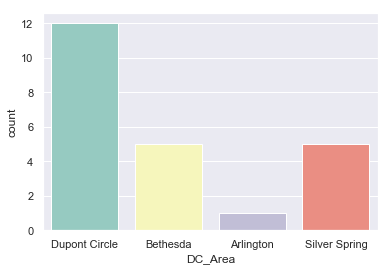

In [156]:
ax = sns.countplot(data = total, x = 'DC_Area', palette = 'Set3')

## Data visualization - Frequencies of restaurants adjusted for population

In [108]:
population = pd.read_csv("C:\\Users\\bgee\\Desktop\\Coursera\\DC Area - Census Populations.csv")
restaurant_counts = pd.DataFrame(total['DC_Area'].value_counts())
restaurant_counts = restaurant_counts.rename(columns = {"DC_Area": "Count"})
restaurant_counts['DC_Area'] = restaurant_counts.index


,Count,DC_Area
Dupont Circle,12,Dupont Circle
Silver Spring,5,Silver Spring
Bethesda,5,Bethesda
Arlington,1,Arlington


In [158]:
restaurants_population = pd.merge(restaurant_counts, population, on = "DC_Area")
restaurants_population['Restaurants_per_100000'] = 100000 * (restaurants_population['Count'] / restaurants_population['Population'])
restaurants_population['Restaurants_per_100000'] = restaurants_population['Restaurants_per_100000'].astype(int)
restaurants_population

,Count,DC_Area,Population,Restaurants_per_100000
0,12,Dupont Circle,10177,117
1,5,Silver Spring,71452,6
2,5,Bethesda,63374,7
3,1,Arlington,12314,8


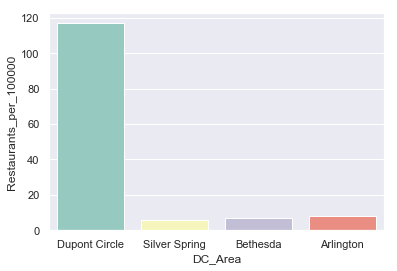

In [161]:
ax = sns.barplot(data = restaurants_population, x = 'DC_Area', y = 'Restaurants_per_100000', palette = 'Set3')